In [ ]:
!pip install pybind11
!pip install fastwer
!pip install pytesseract
import cv2
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import os
import pandas as pd
from difflib import SequenceMatcher

# Step 1: Upload OCR output files
print("Please upload your OCR output files:")
uploaded_ocr = files.upload()

# Step 2: Upload the reference text file
print("Please upload your reference text file (ground_truth.txt):")
uploaded_ref = files.upload()

# Step 3: Create directories for OCR output and reference text files
ocr_dir = './ocr_output/'
ref_dir = './ref_text/'

os.makedirs(ocr_dir, exist_ok=True)
os.makedirs(ref_dir, exist_ok=True)

# Step 4: Save uploaded OCR files
for filename in uploaded_ocr.keys():
    with open(os.path.join(ocr_dir, filename), 'wb') as f:
        f.write(uploaded_ocr[filename])

# Step 5: Save the reference file
for filename in uploaded_ref.keys():
    #if filename == 'Ground_Truth.txt':
        with open(os.path.join(ref_dir, filename), 'wb') as f:
            f.write(uploaded_ref[filename])

# Step 6: List the uploaded files
print("OCR Output Files:")
ocr_files = os.listdir(ocr_dir)
print(ocr_files)

print("Reference Text Files:")
ref_files = os.listdir(ref_dir)
print(ref_files)

# Step 7: Define functions to calculate CER and WER
def calculate_cer(ocr_output, ref_text):
    """Calculate Character Error Rate (CER)"""
    return 1 - SequenceMatcher(None, ocr_output, ref_text).ratio()

def calculate_wer(ocr_output, ref_text):
    """Calculate Word Error Rate (WER)"""
    ocr_words = ocr_output.split()
    ref_words = ref_text.split()
    return 1 - SequenceMatcher(None, ocr_words, ref_words).ratio()

# Step 8: Create empty lists to store data
data = {

    'ocr_output': [],
    'ref_text': [],
    'cer': [],
    'wer': []
}



   # Step 10: Loop through OCR output files and read corresponding ocr output
for ref_file in ref_files:
    if ref_file.endswith('.txt'):
        print(f"Processing file: {ref_file}")

        # Read OCR output lines
        with open(os.path.join(ref_dir, ref_file), 'r') as file:
            ref_text_lines = file.readlines()
            print(f"OCR ref Lines for {ref_file}:")
            print(ref_text_lines)

# Step 10: Loop through OCR output files and read corresponding ground truth
for ocr_file in ocr_files:
    if ocr_file.endswith('.txt'):
        print(f"Processing file: {ocr_file}")

        # Read OCR output lines
        with open(os.path.join(ocr_dir, ocr_file), 'r') as file:
            ocr_output_lines = file.readlines()
            print(f"OCR Output Lines for {ocr_file}:")
            print(ocr_output_lines)

        # to ensure both files have the same number of lines
        if len(ocr_output_lines) != len(ref_text_lines):
            print(f"Line count mismatch in {ocr_file}")
            continue

        # Process each line
        for ocr_output, ref_text in zip(ocr_output_lines, ref_text_lines):
            ocr_output = ocr_output.strip()  # Remove leading/trailing whitespace
            ref_text = ref_text.strip()  # Remove leading/trailing whitespace

            #cer = calculate_cer(ocr_output, ref_text)
           # wer = calculate_wer(ocr_output, ref_text)
            cer = fastwer.score_sent(ocr_output, ref_text, char_level=True)
            wer = fastwer.score_sent(ocr_output, ref_text, char_level=False)
            # Append data to lists
            data['ocr_output'].append(ocr_output)
            data['ref_text'].append(ref_text)
            data['cer'].append(cer)
            data['wer'].append(wer)
# Step 11: Create DataFrame from dictionary
df_output = pd.DataFrame(data)

# Display the DataFrame
df_output


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastwer: filename=fastwer-0.1.3-cp310-cp310-linux_x86_64.whl size=849499 sha256=6da9f4b3a766d558266daa20c5d7c335612beb229572acf642bffda8e834ed3a
  Stored in directory: /root/.cache/pip/wheels/99/b5/22/f6edc9a914bf3b54ebc55e258e2f9aa2297908d85799de228f
Successfully built fastwer
Please upload your OCR output files:


Saving sortie_ocr.txt to sortie_ocr.txt
Please upload your reference text file (ground_truth.txt):


Saving Ground_Truth.txt to Ground_Truth.txt
OCR Output Files:
['sortie_ocr.txt']
Reference Text Files:
['Ground_Truth.txt']
Processing file: Ground_Truth.txt
OCR ref Lines for Ground_Truth.txt:
['LA LIBRE BELGIQUE\n', 'Nuits terribles \n', 'Voulez-vous éviter les nuits terribles pendant lesquelles une rage de dents vous accable? Faites comme ces personnes, ayez toujours chez vous un flacon de DENTOGÈNE. \n', 'qui, en quelques secondes, coupe net et pour toujours, les plus violents maux de dents.\n', 'Gare aux imitations, exigez le véritable DENTOGÈNE. \n', 'Le flacon 8 francs toutes pharmacies. \n', 'a 205 \n', 'Madame, Mademoiselle, \n', "Vous serez enchantées si vous suivez les Cours de Coupe et de Couture par correspondance de l'INSTITUT FEMINA BRUXELLES\n", "En quatre mois d'études, faciles et agréables, vous apprendrez a couper et confectionner les plus élégantes créations de la mode. \n", 'Ecrivez-nous en y joignant le << Bon >> ci dessous. \n', "Bon A renvoyer à : l'INSTITUT FEM

,ocr_output,ref_text,cer,wer
0,T« Lft LIBRE BELGIOAJE,LA LIBRE BELGIQUE,52.9412,100.0000
1,Nuits terribles,Nuits terribles,0.0000,0.0000
2,Voulez-vous éviter les nuits lernbles pendant ...,Voulez-vous éviter les nuits terribles pendant...,4.7904,20.0000
3,"qui, en quelques secondes, coupe net et pour t...","qui, en quelques secondes, coupe net et pour t...",1.1494,6.6667
4,"Gare aux imitations, exigez le véritable DENTO...","Gare aux imitations, exigez le véritable DENTO...",1.8868,14.2857
5,Le flacon o troncs toutes pharmacies.,Le flacon 8 francs toutes pharmacies.,8.1081,33.3333
6,a :o.ï,a 205,100.0000,50.0000
7,"Madame, Mademoiselle,","Madame, Mademoiselle,",0.0000,0.0000
8,Vous serez enchantées si vous suivet les Cours...,Vous serez enchantées si vous suivez les Cours...,10.8333,36.8421
9,En quatro mois d'études. j lacilas et agréable...,"En quatre mois d'études, faciles et agréables,...",14.9254,40.0000


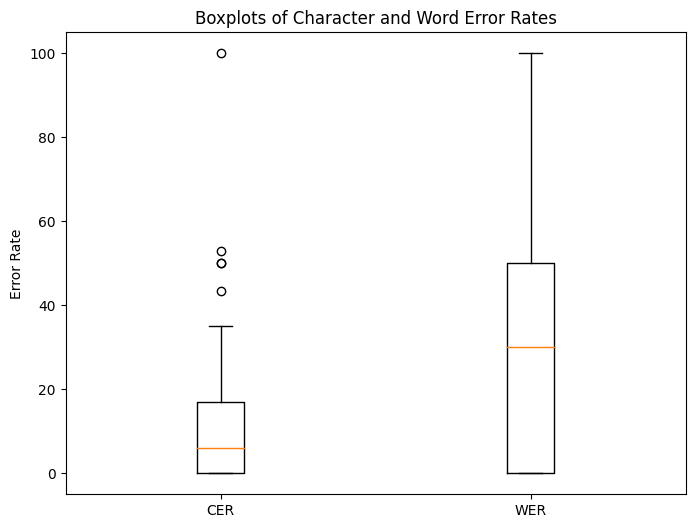

In [ ]:
# @title Boxplots of Character and Word Error Rates

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot([df_output['cer'], df_output['wer']], labels=['CER', 'WER'])
plt.ylabel('Error Rate')
_ = plt.title('Boxplots of Character and Word Error Rates')

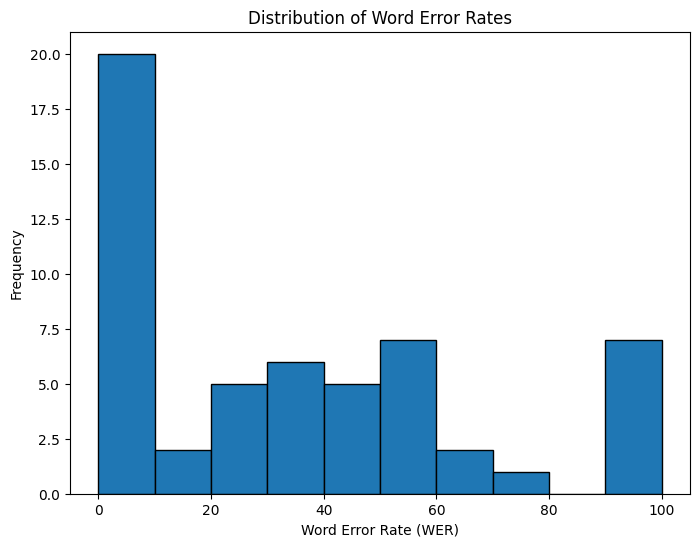

In [ ]:
# @title Distribution of Word Error Rates

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_output['wer'], bins=10, edgecolor='black')
plt.xlabel('Word Error Rate (WER)')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Word Error Rates')

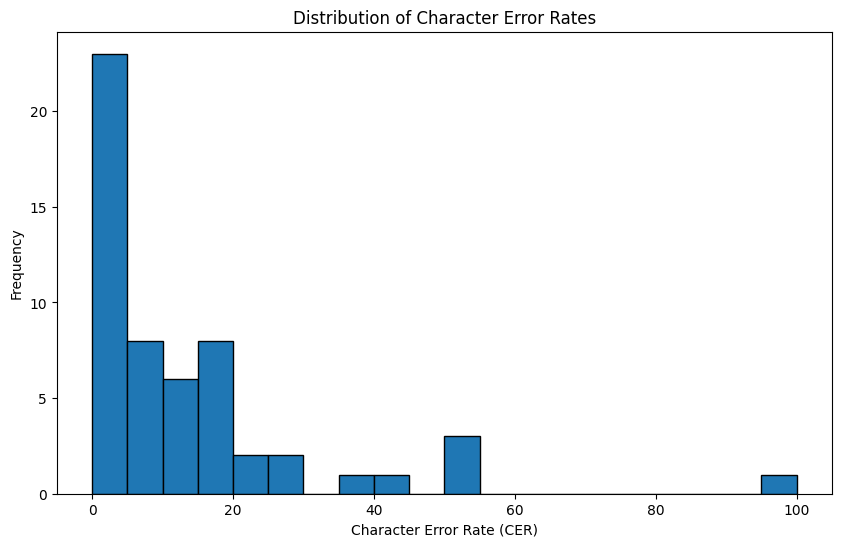

In [ ]:
# Distribution of Character Error Rates

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_output['cer'], bins=20, edgecolor='black')
plt.xlabel('Character Error Rate (CER)')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Character Error Rates')

In [ ]:
#  distribution graph

import matplotlib.pyplot as plt
import seaborn as sns

# Create a distribution plot for CER
sns.distplot(df_output['cer'], bins=10, kde=True, color='blue', hist_kws={'edgecolor':'black'})
plt.title('Distribution of Character Error Rate (CER)')
plt.xlabel('CER')
plt.ylabel('Frequency')
plt.show()

# Create a distribution plot for WER
sns.distplot(df_output['wer'], bins=10, kde=True, color='red', hist_kws={'edgecolor':'black'})
plt.title('Distribution of Word Error Rate (WER)')
plt.xlabel('WER')
plt.ylabel('Frequency')
plt.show()


NameError: name 'df_output' is not defined

In [ ]:
# Overall performances
mean_cer = df_output['cer'].mean()
mean_wer = df_output['wer'].mean()
print(f'Mean CER = {mean_cer}%, Mean WER = {mean_wer}%')

Mean CER = 0.10158696741724928%, Mean WER = 0.312624622503598%


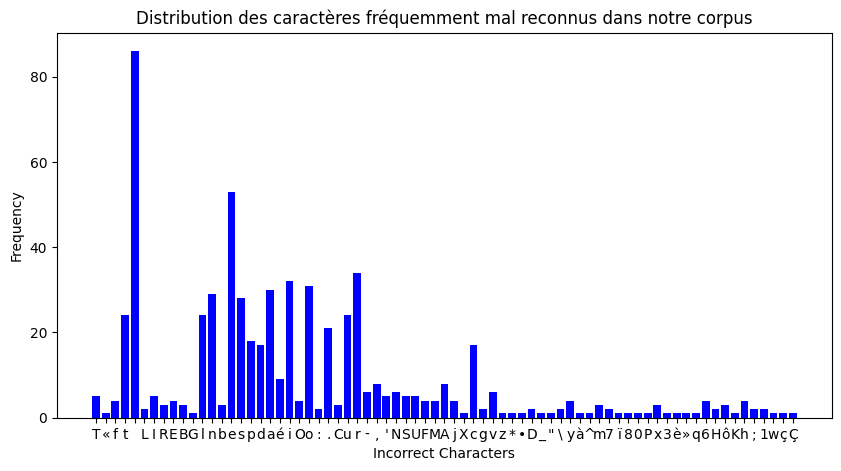

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def extract_incorrect_chars(ocr_output, ref_text):
    """Extract characters from the OCR output that do not match the reference text."""
    incorrect_chars = []
    # Compare each character
    for o_char, r_char in zip(ocr_output, ref_text):
        if o_char != r_char:
            incorrect_chars.append((o_char, r_char))
    return incorrect_chars

# Initialize a Counter to store incorrect characters
incorrect_char_counter = Counter()

# Analyze all entries to count incorrect characters
for ocr_output, ref_text in zip(data['ocr_output'], data['ref_text']):
    mismatches = extract_incorrect_chars(ocr_output, ref_text)
    # Update the counter with OCR characters that were incorrect
    for o_char, r_char in mismatches:
        incorrect_char_counter[o_char] += 1

# Prepare data for plotting
chars, counts = zip(*incorrect_char_counter.items())

plt.figure(figsize=(10, 5))
plt.bar(chars, counts, color='blue')
plt.xlabel('Incorrect Characters')
plt.ylabel('Frequency')
plt.title('Distribution des caractères fréquemment mal reconnus dans notre corpus')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility if needed
plt.show()


In [ ]:
from collections import Counter
import pandas as pd

def extract_incorrect_char_pairs(ocr_output, ref_text):
    """Extract pairs of incorrect OCR characters and their corresponding correct characters."""
    incorrect_pairs = []
    for o_char, r_char in zip(ocr_output, ref_text):
        if o_char != r_char:
            incorrect_pairs.append((o_char, r_char))
    return incorrect_pairs

# Initialize a Counter to store incorrect character pairs with their frequency
incorrect_pair_counter = Counter()

# Analyze all entries to extract and count incorrect character pairs
for ocr_output, ref_text in zip(data['ocr_output'], data['ref_text']):
    pairs = extract_incorrect_char_pairs(ocr_output, ref_text)
    incorrect_pair_counter.update(pairs)

# Convert the counter to a DataFrame
df_incorrect_pairs = pd.DataFrame(incorrect_pair_counter.items(), columns=['Character Pair', 'Frequency'])
df_incorrect_pairs['Incorrect Character'] = [pair[0] for pair in df_incorrect_pairs['Character Pair']]
df_incorrect_pairs['Correct Character'] = [pair[1] for pair in df_incorrect_pairs['Character Pair']]
df_incorrect_pairs.drop(columns=['Character Pair'], inplace=True)

# Display the DataFrame
print(df_incorrect_pairs)


     Frequency Incorrect Character Correct Character
0            1                   T                 L
1            1                   «                 A
2            1                   f                 I
3            1                   t                 B
4            1                                     R
..         ...                 ...               ...
383          1                   ,                 .
384          1                   ;                 .
385          1                   .                 o
386          1                   .                 r
387          1                   .                 m

[388 rows x 3 columns]
